## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([3, 6, 9, 12, 15])
n = len(y)
#parameter
omega = 0.1
a = 0.5
b = 4

In [5]:
np.random.seed(123)
n_iter = 20000
burn_in = 5000
mu_samples = np.zeros(n_iter)
tau_samples = np.zeros(n_iter)
mu_samples[0] = 0.0
tau_samples[0] = 3.0

for t in range(1, n_iter):
    shape = a + n/2
    rate = b + 0.5 * np.sum((y - mu_samples[t-1])**2)
    tau_samples[t] = np.random.gamma(shape , 1 / rate)
    var_mu = (1 / (omega + n * tau_samples[t]))
    mean_mu = (tau_samples[t] * np.sum(y)) * var_mu
    mu_samples[t] = np.random.normal(mean_mu, np.sqrt(var_mu))

mu_post = mu_samples[burn_in:]
tau_post = tau_samples[burn_in:]

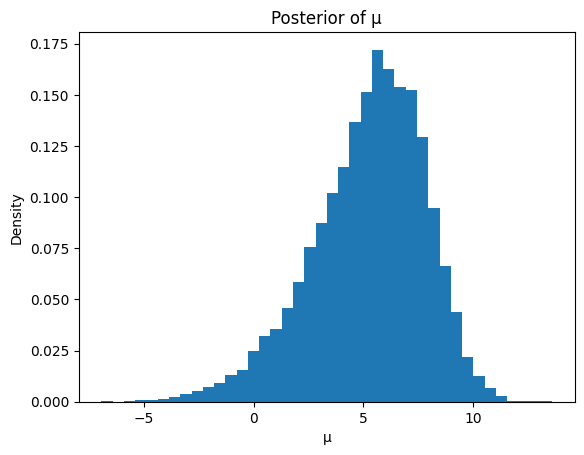

In [6]:
plt.figure()
plt.hist(mu_post, bins=40, density=True)
plt.title("Posterior of μ")
plt.xlabel("μ")
plt.ylabel("Density")
plt.show()

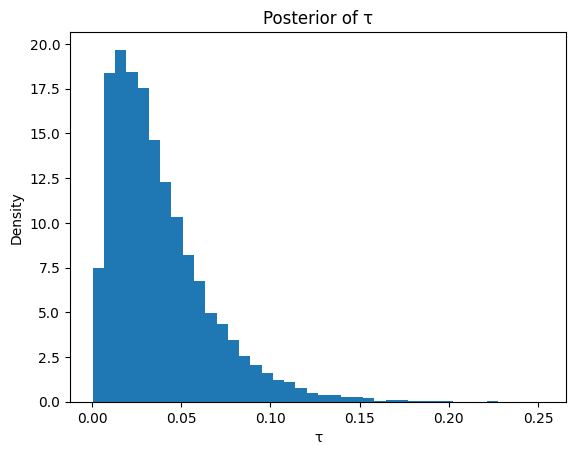

In [7]:
plt.figure()
plt.hist(tau_post, bins=40, density=True)
plt.title("Posterior of τ")
plt.xlabel("τ")
plt.ylabel("Density")
plt.show()